In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../data/raw/esg_scores.csv')

df.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258


In [28]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])

print("\nColumns:\n", df.columns.tolist())

print("\nData Types:\n")
print(df.dtypes)

print("\nMissing Values\n")
print(df.isnull().sum())

Rows: 722 Columns: 21

Columns:
 ['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl', 'environment_grade', 'environment_level', 'social_grade', 'social_level', 'governance_grade', 'governance_level', 'environment_score', 'social_score', 'governance_score', 'total_score', 'last_processing_date', 'total_grade', 'total_level', 'cik']

Data Types:

ticker                  object
name                    object
currency                object
exchange                object
industry                object
logo                    object
weburl                  object
environment_grade       object
environment_level       object
social_grade            object
social_level            object
governance_grade        object
governance_level        object
environment_score        int64
social_score             int64
governance_score         int64
total_score              int64
last_processing_date    object
total_grade             object
total_level             object
cik          

In [30]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

In [32]:
print(df.columns.tolist())

['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl', 'environment_grade', 'environment_level', 'social_grade', 'social_level', 'governance_grade', 'governance_level', 'environment_score', 'social_score', 'governance_score', 'total_score', 'last_processing_date', 'total_grade', 'total_level', 'cik']


In [34]:
esg_columns = ['environment_score', 'social_score', 'governance_score', 'total_score']
df[esg_columns].describe()

,environment_score,social_score,governance_score,total_score
count,722.000000,722.000000,722.000000,722.000000
mean,404.806094,292.182825,278.761773,975.750693
std,145.103870,57.017406,47.031536,218.751796
min,200.000000,160.000000,75.000000,600.000000
25%,240.000000,243.000000,235.000000,763.000000
50%,483.000000,302.000000,300.000000,1046.000000
75%,518.750000,322.750000,310.000000,1144.000000
max,719.000000,667.000000,475.000000,1536.000000


In [36]:
df.to_csv('../data/processed/esg_scores_cleaned.csv', index=False)

In [38]:
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='total_score', ylabel='Count'>

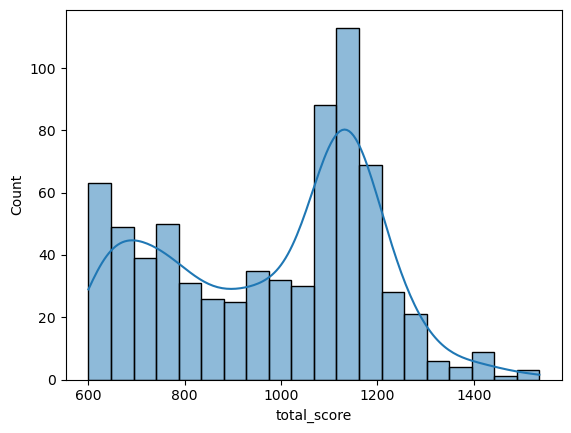

In [40]:
sns.histplot(df['total_score'], bins=20, kde=True)

Text(0.5, 1.0, 'Distribution of Total Scores')

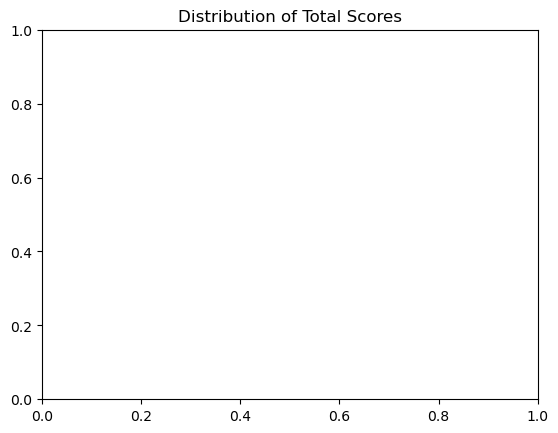

In [42]:
plt.title('Distribution of Total Scores')

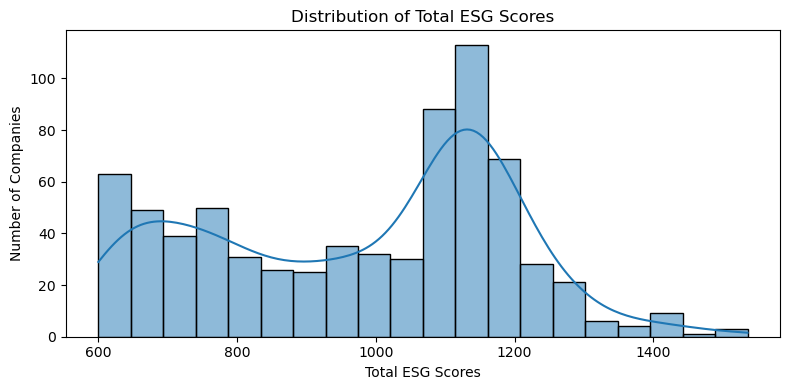

In [44]:
plt.figure(figsize=(8, 4))

sns.histplot(df['total_score'], bins=20, kde=True)

plt.title('Distribution of Total ESG Scores')
plt.xlabel('Total ESG Scores')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.savefig('../visuals/total_score_distributions.png', dpi=300)
plt.show()


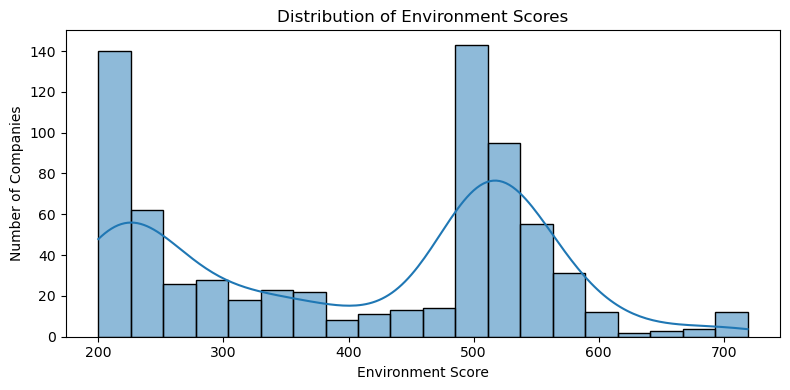

In [45]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 4))

sns.histplot(df['environment_score'], bins=20, kde=True)

plt.title('Distribution of Environment Scores')
plt.xlabel('Environment Score')
plt.ylabel('Number of Companies')

plt.savefig('../visuals/enviroment_score_distribution.png', dpi=300)

plt.tight_layout()
plt.show()